# Pustka
Tym razem zaczynacie z pustym notebookiem. To trochę symulacja sytuacji przeprowadzania projektu. Dzisiaj przerobimy przede wszystkim:
* organizacja kodu z poprzednich zajęć - tworzymy funkcję która wczytuje dane i robi tfr
* pętla przez osoby badane - robimy tfr dla wszystkich osób
* uśrednianie tfr - aby otrzymać między innymi średnie wykresy tfr
* selekcja regionów zainteresowania
* analiza

Ostatni punkt, wraz z wielokrotnymi porównaniami omówimy jeszcze w przyszłym tygodniu. To będzie ostatnia cegła do twierdzy waszych kompetencji przed Wami pozostanie tylko zabawa z projektem.

## Zadanie 01
Stwórz w tym notebook'u najpierw dwie komórki:
* w pierwszej umieść wszystkie potrzebne importy
* w drugiej zaś kod, którym wczytasz jeden plik oraz utworzysz dla niego tfr
Potrzebny kod znajdziesz w notebook'u z ostatnich zajęć. Spróbuj wybrać to co potrzebne oraz zrobić kosmetyczną zmianę tak aby kod robił tfr dla obu warunków razem. To ważne - druga komórka ma robić tfr bez podziału na warunki - dla obu warunków łącznie!

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet

%matplotlib inline

In [2]:
os.chdir(r'C:\Users\Sarenka\Dropbox\Sarenka\ZAJECIA\Analiza Danych EEG 2017 - 2018\dane\group analysis')
files = os.listdir()
epochs = mne.read_epochs(files[11], preload=True)
sfreq = epochs.info['sfreq']

freq = np.arange(3, 20)
n_cycles = freq / 2.5
tfr = tfr_morlet(epochs, freq, n_cycles, use_fft=True,
                 return_itc=False, n_jobs=3, decim=20)

Reading sternberg_diam_105_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.6s finished


## Zadanie 02
Przekształć teraz kod z drugiej komórki w funkcję, która przyjmuje nazwę pliku oraz zwraca tfr dla tego pliku.
Przypominam, że funkcje piszemy tak:
```python
def nazwa_funkcji(argument1, argument2):
    # cośtam cośtam
    # cośtam cośtam
    return jakiś_wynik
```
w Waszym wypadku 'sygnatura' funkcji będzie taka:
```python
def daj_mnie_ten_tfr(nazwa_pliku):
    # wczytanie pliku
    # definicja zmiennych do analizy tfr
    # analiza tfr
    return tfr
```

In [3]:
def daj_mnie_ten_tfr(nazwa_pliku):
    epochs = mne.read_epochs(nazwa_pliku, preload=True)

    freq = np.arange(3, 20)
    n_cycles = freq / 2.5
    tfr = tfr_morlet(epochs, freq, n_cycles, use_fft=True,
                     return_itc=False, n_jobs=3, decim=20)
    return tfr

In [4]:
tfr2 = daj_mnie_ten_tfr(files[10])

Reading sternberg_diam_103_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  59 out of  64 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.7s finished


## Zadanie 03
Wreszcie gdy mamy już interesującą nas funkcję, spróbujemy wykonać ją dla wszystkich plików. Ale dojdziemy do tego krok po kroku.
### Krok 1
Wyobraźmy sobie, że mamy listę plików o nazwie `files` jak napisać pętlę aby robiła coś kolejno z nazwami plików?  
Na przykładzie funkcji print:

In [1]:
files = ['plik1.fif', 'plik2.fif', 'jakiś dziwny plik.png',
         'Jak python zmienił moje życie - wypracowanie.docx']

In [2]:
for this_file in files:
    print(this_file)

plik1.fif
plik2.fif
jakiś dziwny plik.png
Jak python zmienił moje życie - wyprawcowanie.docx


In [3]:
for this_file in files:
    print(this_file[::2])

pi1ff
pi2ff
jkśdin lkpg
Jkpto mei oeżce-wpacwnedc


W waszym wypadku wystarczy podmienić funkcję `print` na Waszą funkcję do wczytywania pliku i robienia tfr.  

### Krok 2
Pozostaje jeszcze jedna sprawa - chcielibyśmy jakoś agregować te tfr-y na przykład zbierać do jednej listy.  
Całe szczęście nie jest to trudne. Poniżej konkretny przykład, weźmy najpierw funkcję, która zwraca nam trzy
losowe liczby:

In [4]:
import numpy as np

def three_random():
    return np.random.rand(3)

In [5]:
three_random()

array([0.33270893, 0.61921339, 0.85700122])

In [6]:
three_random()

array([0.77534818, 0.67226044, 0.33410465])

Za każdym razem wektor trzech losowych liczb między zero a jeden. Teraz chcemy wykonać tę funkcję pięć razy i każdy z pięciu kolejnych wyników przechowywać w liście `liczby`.

In [7]:
# tworzymy pustą listę:
liczby = list()

# pięć razy ...
for i in range(5):
    # uruchamiany naszą funkcję:
    trzy = three_random()
    
    # a następnie doklejamy jej wynik do listy 'liczby':
    liczby.append(trzy)

In [8]:
liczby

[array([0.50266703, 0.33421762, 0.59706877]),
 array([0.68342066, 0.33242564, 0.49359561]),
 array([0.76438025, 0.9343985 , 0.22734359]),
 array([0.49356043, 0.12667151, 0.421795  ]),
 array([0.10468988, 0.81883416, 0.01626112])]

In [10]:
liczby[-2:]

[array([0.49356043, 0.12667151, 0.421795  ]),
 array([0.10468988, 0.81883416, 0.01626112])]

W ten sam sposób chcecie wykonywać na kolejnych plikach waszą funkcję do tfr-ów a następnie doklejać je do listy.

### Krok 3
Twoja kolej, czas przeanalizować te dane! Uzupełnij kod poniżej:

In [6]:
tfrs = list()
for fname in files:
    tfr = daj_mnie_ten_tfr(fname)
    tfrs.append(tfr)

Reading sternberg_diam_025_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.6s


Reading sternberg_diam_030_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.8s finished


86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_037_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_038_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
92 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_053_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished


91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_068_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
94 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished


Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_077_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.7s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_086_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished


86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_097_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.7s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_100_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s


Reading sternberg_diam_103_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_105_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  59 out of  64 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished


Reading sternberg_diam_116_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_118_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
80 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.5s finished


80 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_120_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.4s finished


0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.6s finished


Tak, tylko tyle wystarczy aby przejść z poziomu pojedynczego pliku, na przetwarzanie wielu!
W tym punkcie, jeżeli masz listę tfr'ów, możesz skorzystać z wygodnej funkcji mne python'a do uśredniania wielu tfr'ów.  
Ale, ojej, zapomnieliśmy o jednej rzeczy! Chcielibyśmy aby każdy tfr był baseline-corrected. Całe szczęście każdy tfr ma metodę [`apply_baseline`](https://martinos.org/mne/stable/generated/mne.time_frequency.AverageTFR.html#mne.time_frequency.AverageTFR.apply_baseline) (tak, to poprzednie to link do dokumentacji oraz - tak, przeczytaj dokumentację metody `apply_baseline`).  

Metoda `apply_baseline` działa, jak to mówią programiści *in-place* tzn. zmienia Wam waszą zmienną w pamięci komputera, nie musicie przechwytywać zmienionej kopii. W związku z tym nie musimy tworzyć nowej listy z tfr'ami zbaseline'owanymi - wystarczy jak przejedziemy pętlą przez wszystkie tfr w liście `tfrs` i dla każdego zastosujemy `apply_baseline`.
(baseline robimy taki sam jak na ostatnich zajęciach):

In [7]:
for tfr in tfrs:
    tfr.apply_baseline((-0.4, -0.1), mode='percent')

Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)


In [8]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [9]:
tfr_avg = mne.grand_average(tfrs)

No baseline correction applied


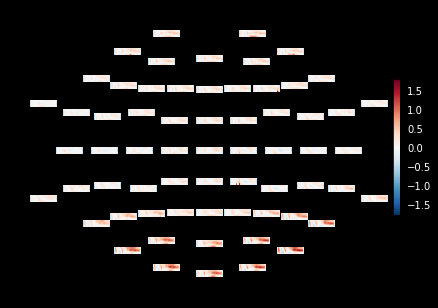

No baseline correction applied
Averaging TFR over channels ['Pz', 'P3', 'P7', 'O1', 'Oz', 'P1', 'P5', 'PO7', 'PO3', 'POz']
No baseline correction applied
No baseline correction applied
No baseline correction applied


In [10]:
tfr_avg.plot_topo()

## Analiza ROI

In [11]:
channel_oi = 'PO8'
freq_oi = (9, 13)
time_oi = (1., 1.4)

In [12]:
ch_idx = tfr_avg.ch_names.index(channel_oi)
print(ch_idx)

49


In [13]:
from mypy.utils import find_range

In [14]:
foi = find_range(tfr_avg.freqs, freq_oi)
toi = find_range(tfr_avg.times, time_oi)

In [18]:
tfr_avg.data.shape

(64, 17, 26)

In [19]:
tfr_avg.times.shape

(26,)

In [21]:
avg = tfr_avg.data[ch_idx, foi, toi].mean()

1.1432391743178607

In [22]:
def tfr_for_each_load(nazwa_pliku):
    epochs = mne.read_epochs(nazwa_pliku, preload=True)
    freq = np.arange(3, 20)
    n_cycles = freq / 2.5
    tfr_l2 = tfr_morlet(epochs['load_2'], freq, n_cycles, use_fft=True,
                        return_itc=False, n_jobs=3, decim=20)
    tfr_l4 = tfr_morlet(epochs['load_4'], freq, n_cycles, use_fft=True,
                        return_itc=False, n_jobs=3, decim=20)
    return tfr_l2, tfr_l4

In [23]:
tfrs_l2 = list()
tfrs_l4 = list()

for fname in files:
    tfr_l2, tfr_l4 = tfr_for_each_load(fname)
    tfrs_l2.append(tfr_l2)
    tfrs_l4.append(tfr_l4)

Reading sternberg_diam_025_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.8s remaining:    0.6s


Reading sternberg_diam_030_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished


86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s


Reading sternberg_diam_037_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished


Reading sternberg_diam_038_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
92 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s


Reading sternberg_diam_053_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.1s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s


Reading sternberg_diam_068_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
94 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s


Reading sternberg_diam_077_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s


Reading sternberg_diam_086_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished


86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished


Reading sternberg_diam_097_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
93 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  46 out of  64 | elapsed:    1.7s remaining:    0.6s


Reading sternberg_diam_100_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished


86 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.3s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s


Reading sternberg_diam_103_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.3s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s


Reading sternberg_diam_105_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.3s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.3s


Reading sternberg_diam_116_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s


Reading sternberg_diam_118_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
80 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.4s remaining:    1.4s


Reading sternberg_diam_120_AK-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  33 out of  64 | elapsed:    1.5s remaining:    1.4s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    2.0s finished


In [25]:
for tfrl2, tfrl4 in zip(tfrs_l2, tfrs_l4):
    tfrl2.apply_baseline((-0.4, -0.1), mode='percent')
    tfrl4.apply_baseline((-0.4, -0.1), mode='percent')

Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying b

In [33]:
avg_l2 = list()
avg_l4 = list()

for tfrl2 in tfrs_l2:
    avg_l2.append(tfrl2.data[ch_idx, foi, toi].mean())
    
for tfrl4 in tfrs_l4:
    avg_l4.append(tfrl4.data[ch_idx, foi, toi].mean())

avg_l2 = np.array(avg_l2)
avg_l4 = np.array(avg_l4)

In [36]:
import seaborn as sns

In [40]:
sns.violinplot(x=['load2'] * len(avg_l2) + ['load4'] * len(avg_l2),
               y=np.concatenate([avg_l2, avg_l4]))

In [41]:
from scipy.stats import ttest_rel

In [42]:
t, p = ttest_rel(avg_l4, avg_l2)

In [45]:
print(t, p)

0.59141151663 0.563672810023


In [47]:
fig, ch_list = epochs.plot_sensors(kind='select')

In [51]:
ch_names = ch_list.copy()

In [52]:
from mypy.chans import find_channels

In [56]:
ch_idx = find_channels(epochs, ch_names)

In [57]:
avg_l2 = list()
avg_l4 = list()

for tfrl2 in tfrs_l2:
    avg_l2.append(tfrl2.data[ch_idx, foi, toi].mean())
    
for tfrl4 in tfrs_l4:
    avg_l4.append(tfrl4.data[ch_idx, foi, toi].mean())

avg_l2 = np.array(avg_l2)
avg_l4 = np.array(avg_l4)

In [58]:
t, p = ttest_rel(avg_l4, avg_l2)

In [59]:
print(t, p)

0.208214183462 0.838060420728


## porzucamy ROI

In [61]:
test_avg = tfrs_l2[3].data[ch_idx].mean(axis=0)

In [63]:
plt.imshow(test_avg)

In [65]:
import mypy
mypy.viz.heatmap(test_avg, x_axis=tfrs_l2[3].times, y_axis=tfrs_l2[3].freqs)

(<matplotlib.axes._subplots.AxesSubplot at 0x266ec3905f8>,
 <matplotlib.colorbar.Colorbar at 0x266ebeeb160>)

In [66]:
avg_l2 = list()
avg_l4 = list()

for tfrl2 in tfrs_l2:
    avg_l2.append(tfrl2.data[ch_idx].mean(axis=0))
    
for tfrl4 in tfrs_l4:
    avg_l4.append(tfrl4.data[ch_idx].mean(axis=0))

In [70]:
avg_l2[3].shape

(17, 26)

In [72]:
avg_l2 = np.stack(avg_l2, axis=0)
avg_l4 = np.stack(avg_l4, axis=0)

In [73]:
t_values, p_values = ttest_rel(avg_l2, avg_l4, axis=0)

In [74]:
t_values.shape

(17, 26)

In [91]:
mypy.viz.heatmap(t_values, x_axis=tfrs_l2[3].times, y_axis=tfrs_l2[3].freqs,
                 mask=p_values < 0.05, outlines=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x266ed6db2e8>,
 <matplotlib.colorbar.Colorbar at 0x266ed6ccd68>)

In [81]:
reject, p_value_corrected = mne.stats.fdr_correction(p_values)

In [84]:
reject.any()

False

In [86]:
avg_l4.shape

(15, 17, 26)

In [88]:
from mne.stats.cluster_level import permutation_cluster_test

In [90]:
def ttest_rel_no_p(*arg):
    t, p = ttest_rel(*arg)
    return t

t_values, clusters, cluster_p_value, _ = permutation_cluster_test(
    [avg_l4, avg_l2], stat_fun=ttest_rel_no_p, threshold=2., n_permutations=10000)

stat_fun(H1): min=-3.841106 max=4.953321
Running initial clustering
Found 7 clusters
Permuting 9999 times...
[....................................... ] 99.84998 |    Computing cluster p-values
Done.


In [92]:
cluster_p_value

array([ 0.7026,  0.8186,  0.36  ,  0.0252,  0.1184,  0.4771,  0.1354])

In [94]:
mypy.viz.heatmap(t_values, x_axis=tfrs_l2[3].times, y_axis=tfrs_l2[3].freqs,
                 mask=clusters[3], outlines=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x266ed6ee550>,
 <matplotlib.colorbar.Colorbar at 0x266ed8335f8>)